In [1]:
import numpy as np
import importlib
import sys
sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/Parallel_Simulation')
from Data_Treatement import *
import matplotlib.pyplot as plt
media = "/media/hcleroy/Simulation_Res/Parallel_Simulation_aging/fixed_density/"
from scipy.special import erfc
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams["xtick.direction"] = "in"
matplotlib.rcParams["ytick.direction"] = "in"

import pandas as pd

In [2]:
avR = lambda L,N : 2*(np.exp(-1.5/(L/N)) * np.sqrt(L/N*6/np.pi)*(3+2*L/N) - 9*erfc(np.sqrt(3/2/(L/N))))/(9*L/N) #average distance between equilibrated nodes
print(avR(10**3,50))
print(np.sqrt(2*10**3/50/3))
print(1/avR(10**3,50))

2.6696353742394026
3.6514837167011076
0.3745829897406521


In [3]:
density = 'mu5e_2_'
Names = ['N5','N10','N25','N50','N100']
N = [5,10,25,50]
L = [100,200,500,1000]
isfs = list()
for name in Names:
    print(name)
    isfs.append(Data_Treatement(media+density+name+'.hdf',data_type='ISF'))
for isf  in isfs:
    isf.average(num_bins=70,log_scale=True)

N5
N10
N25
N50
N100


/home/hcleroy/PostDoc/aging_condensates/Simulation/Parallel_Simulation/Data_Treatement.py:279: RuntimeWarning: invalid value encountered in divide
  weighted_average /=count


In [4]:
for isf in isfs:
    print(isf.attributes)

{'ell_tot': 100, 'Energy': -15, 'kdiff': 0.001, 'seed': 583684, 'Nlinker': 5, 'dimension': 3, 'step_tot': 100000, 'check_steps': 10000, 'coarse_grained_step': 100, 'cluster_max_distance': "{'Cluster': (<class 'Cluster.Cluster'>, (3.65,)), 'MSD': (<class 'MSD.MSD'>, ()), 'ISF': (<class 'ISF.ISF'>, (0.374, 10)), 'PCF': (<class 'PCF.PCF'>, (15, 50)), 'PCF_L': (<class 'PCF.PCF_L'>, (100, 30)), 'NRG': (<class 'Energy.NRG'>, ())}", 'MSD_args': {'NRG': True, 'Cluster': True, 'MSD': False, 'ISF': True, 'PCF': True, 'PCF_L': False}, 'ISF_arg': 2.0}
{'ell_tot': 200, 'Energy': -15, 'kdiff': 0.001, 'seed': 29701, 'Nlinker': 10, 'dimension': 3, 'step_tot': 500000, 'check_steps': 10000, 'coarse_grained_step': 100, 'cluster_max_distance': "{'Cluster': (<class 'Cluster.Cluster'>, (3.65,)), 'MSD': (<class 'MSD.MSD'>, ()), 'ISF': (<class 'ISF.ISF'>, (0.374, 10)), 'PCF': (<class 'PCF.PCF'>, (15, 50)), 'PCF_L': (<class 'PCF.PCF_L'>, (200, 30)), 'NRG': (<class 'Energy.NRG'>, ())}", 'MSD_args': {'NRG': True

In [5]:
avR = lambda L,N : 2*(np.exp(-1.5/(L/N)) * np.sqrt(L/N*6/np.pi)*(3+2*L/N) - 9*erfc(np.sqrt(3/2/(L/N))))/(9*L/N) #average distance between equilibrated nodes
print(avR(1000,50))
print(1/(avR(1000,50)))
print(1/(np.sqrt(2*500/25/3)))
for isf in isfs:
    print(isf.attributes['cluster_max_distance'])
    

2.6696353742394026
0.3745829897406521
0.27386127875258304
{'Cluster': (<class 'Cluster.Cluster'>, (3.65,)), 'MSD': (<class 'MSD.MSD'>, ()), 'ISF': (<class 'ISF.ISF'>, (0.374, 10)), 'PCF': (<class 'PCF.PCF'>, (15, 50)), 'PCF_L': (<class 'PCF.PCF_L'>, (100, 30)), 'NRG': (<class 'Energy.NRG'>, ())}
{'Cluster': (<class 'Cluster.Cluster'>, (3.65,)), 'MSD': (<class 'MSD.MSD'>, ()), 'ISF': (<class 'ISF.ISF'>, (0.374, 10)), 'PCF': (<class 'PCF.PCF'>, (15, 50)), 'PCF_L': (<class 'PCF.PCF_L'>, (200, 30)), 'NRG': (<class 'Energy.NRG'>, ())}
{'Cluster': (<class 'Cluster.Cluster'>, (3.65,)), 'MSD': (<class 'MSD.MSD'>, ()), 'ISF': (<class 'ISF.ISF'>, (0.374, 10)), 'PCF': (<class 'PCF.PCF'>, (15, 50)), 'PCF_L': (<class 'PCF.PCF_L'>, (500, 30)), 'NRG': (<class 'Energy.NRG'>, ())}
{'Cluster': (<class 'Cluster.Cluster'>, (3.65,)), 'MSD': (<class 'MSD.MSD'>, ()), 'ISF': (<class 'ISF.ISF'>, (0.374, 10)), 'PCF': (<class 'PCF.PCF'>, (15, 50)), 'PCF_L': (<class 'PCF.PCF_L'>, (1000, 30)), 'NRG': (<class 'Ener

4
6
7
8
10


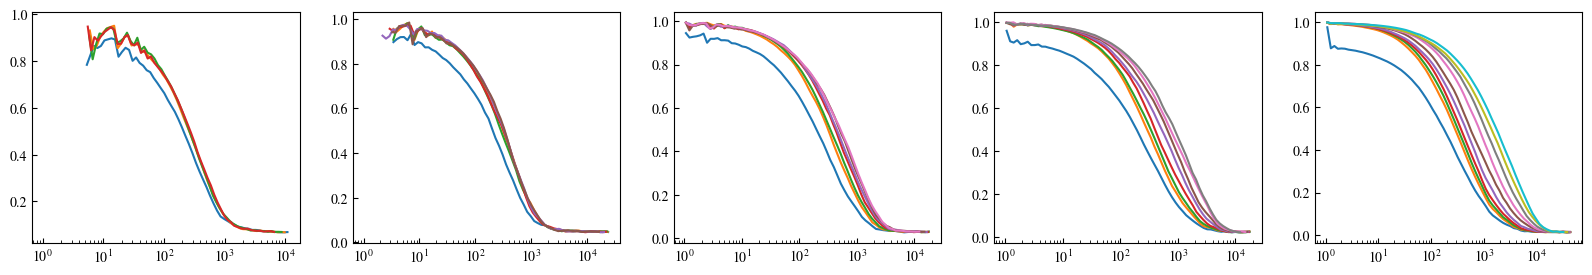

In [6]:
fig,ax = plt.subplots(figsize=(4*len(isfs),3),ncols=len(isfs))
colors = ['red','black']
n=0
#imax=5
for isf in isfs:
    print(isf.data[0].__len__())
    for time,data in zip(isf.binned_time,isf.average_data):
        ax[n].plot(time,data)#,color=colors[n])    
    ax[n].set_xscale('log')
    n+=1

In [7]:
time_shifts = list()
for name in Names:
    time_shift = Data_Treatement(media+density+name+'.hdf',data_type='Time_shift')
    time_shifts.append( np.mean(time_shift.data,axis=0))

In [8]:
#s_exp = lambda t,A,alpha,tau : A*np.exp(-(t/tau)**alpha) if alpha>0 else 0
def s_exp (t,A,alpha,tau):
    if tau>0 and A<=1.5:
        return A*np.exp(-(t/tau)**alpha)
    else:
        return 0.
params = list()
for isf in isfs:
    param=list()
    i=0
    for time,data in zip(isf.binned_time,isf.average_data):
        #print(time)
        #print(isf)
        s = pd.Series(data)
        # Use linear interpolation to fill NaNs
        s = s.interpolate(method='linear')
        # Convert back to a numpy array if needed
        data = s.to_numpy()
        popt,pconv = curve_fit(s_exp,time,data,p0 = (1,1,1000))
        param.append(popt)
    param= np.array(param)
    params.append(param)

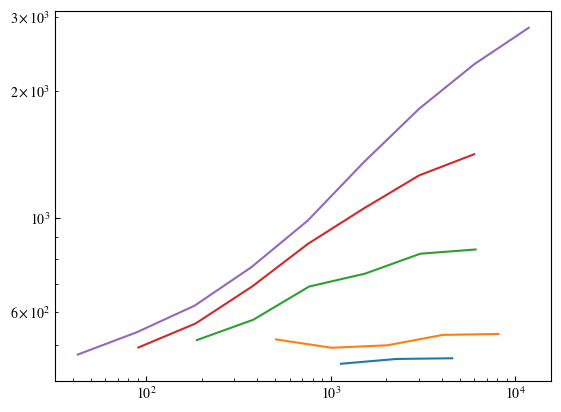

In [9]:
for time_shift,param in zip(time_shifts,params):
    plt.plot(time_shift[1:],param[1:,2])
plt.yscale('log')
plt.xscale('log')

/tmp/ipykernel_36496/2064530336.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis')


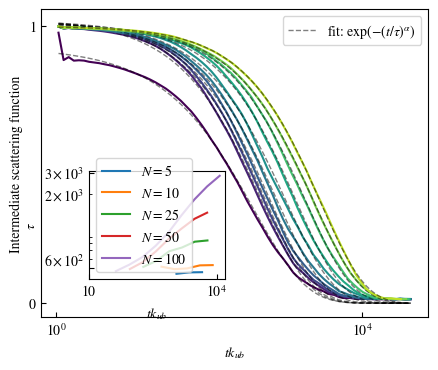

In [16]:
viridis = cm.get_cmap('viridis')
fig,ax = plt.subplots(figsize = (5,4))

n=0
for x,y in zip(isfs[-1].binned_time,isfs[-1].average_data):
    ax.plot(x,y,color=viridis(n/isfs[-1].binned_time.__len__()))
    
    if n==0:
        ax.plot(x,s_exp(x,*param[n]),color='black',linestyle='--',linewidth=1.,alpha=0.5,label=r'fit: $\exp(-(t/\tau)^\alpha)$')
    else:
        ax.plot(x,s_exp(x,*param[n]),color='black',linestyle='--',linewidth=1.,alpha=0.5)
    n+=1
ax.set_xscale('log')
ax.set_yticks([0.,1.])
ax.set_xticks([10**0,10**4])
ax.xaxis.set_minor_locator(plt.NullLocator())
ax.set_ylabel('Intermediate scattering function',rotation=90)
ax.set_xlabel(r'$tk_{ub}$')
ax.legend()

inset_ax = inset_axes(ax, width="35%", height="35%", bbox_to_anchor=(-0.2,-0.2,1.,1.),bbox_transform = ax.transAxes,loc='center')  # 30% of parent dimensions
#inset_ax.set_yticks([0.,1.],['0','1'])
#inset_ax.plot(av_time_shift,param[:,2])
labels = [r'$N = 5$',r'$N=10$',r'$N=25$',r'$N=50$',r'$N=100$']
k=0
for time_shift,param in zip(time_shifts,params):
    inset_ax.plot(time_shift[1:],param[1:,2], label = labels[k])
    k+=1
inset_ax.set_xscale('log')
inset_ax.set_yscale('log')
inset_ax.set_yticks([500,3000])
inset_ax.set_xticks([10,10**4],[r'$10$',r'$10^4$'])
inset_ax.xaxis.set_minor_locator(plt.NullLocator())
inset_ax.set_xlabel(r'$tk_{ub}$')
inset_ax.set_ylabel(r'$\tau$')
inset_ax.legend()
#plt.savefig('isf_tau_loglog_inset.svg',transparent=True,bbox_inches='tight')